## Noisy neuron access consciousness

The point of this notebook is to show that a very simple system can produce similar data as seen in Figure 4B of this paper: https://science.sciencemag.org/content/369/6511/1626.

The idea of the model is this: We are given a stimulus intensity between 0 and 1. We have one neuron that copies this stimulus intensity at the stimulus offset. Now during the delay period (2500 time steps in this case), this value is gradually corrupted by random noise. We say that whatever value the neuron has at the end will decide the action of our neuron, i.e. it will dictate whether the neuron considers the stimulus as 'seen' or 'not seen'. We will define any value below 0.5 as 'not seen', and above as 'seen'.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from darts import TimeSeries
from darts.utils import timeseries_generation as tg

LENGTH = 2500

In [3]:
stimulus_intensity_ts = tg.constant_timeseries(value=1, length=LENGTH)
noise = tg.random_walk_timeseries(length=LENGTH, std=0.01)

We will assume that at every time step, gaussian noise with a mean of 0 and a standard deviation of 0.01 will be added to the state of the neuron. We can do this by computing gaussian random walks like the one below and add them to a constant time series of the initial stimulus value.

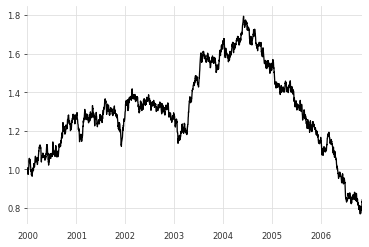

In [4]:
(stimulus_intensity_ts + noise).plot()

As measure for accuracy we compute 1 minus the distance between the actual value, be that stimulus intensity or the decision that the neuron encodes at the end.

In [28]:
stimulus_predictions = []
decision_predictions = []

for trial in range(200):
    stimulus_intensity = random.uniform(0, 1)
    stimulus_intensity_ts = tg.constant_timeseries(value=stimulus_intensity, length=LENGTH)
    noise = tg.random_walk_timeseries(length=LENGTH, std=0.005)
    neuron_activity = stimulus_intensity_ts + noise
    
    decision = int(neuron_activity.last_value() > 0.5)
    decision_ts = tg.constant_timeseries(value=decision, length=LENGTH)
    
    stimulus_prediction_performance = 1 - abs(stimulus_intensity - neuron_activity)
    stimulus_predictions.append(stimulus_prediction_performance)
    
    decision_prediction = neuron_activity.map(lambda x: int(x > 0.5))
    decision_prediction_performance = 1 - abs(decision_ts - decision_prediction)
    decision_predictions.append(decision_prediction_performance)



In [29]:
avg_stimulus_prediction = sum(stimulus_predictions) / len(stimulus_predictions)
avg_decision_prediction = sum(decision_predictions) / len(decision_predictions)

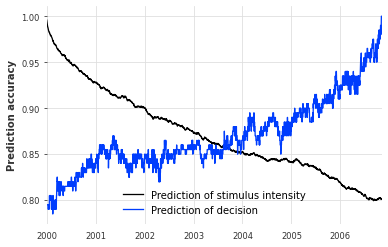

In [31]:
avg_stimulus_prediction.plot(label='Prediction of stimulus intensity')
avg_decision_prediction.plot(label='Prediction of decision')
plt.ylabel('Prediction accuracy')
plt.legend()

This plot shares the relevant properties of Figure 4B of the paper after the delay onset in the sense that the neuron transissions from at first mainly encoding stimulus intensity to encoding the action/decision that will be made based on our rule mentioned above.